In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Plot Exponential Distribution of the Iphone

In [12]:
def reliability(l,x):
    return np.exp(-l * x)

def time_to_failure(l,x):
    return 1 - np.exp(-l * x)

In [19]:
(time_to_failure(chosen_lambda, 5) - time_to_failure(chosen_lambda, 2)) / reliability(chosen_lambda, 2)

0.45118836390597356

In [18]:
1/5

0.2

In [13]:
chosen_lambda = 1/5
x = np.arange(0,5,0.001)
y = reliability(chosen_lambda, x)
y2 = time_to_failure(chosen_lambda, x)

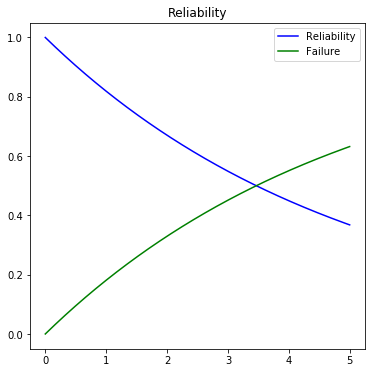

In [16]:
plt.figure(figsize=(6,6))
plt.title("Reliability")
plt.plot(x,y, label='Reliability', color="blue")
plt.plot(x,y2, label='Failure', color="Green")
plt.legend()
plt.show()

## Problem 4

In [112]:
def hypoexponential_F(lamb1,lamb2, t):
    return 1 - (lamb2)/(lamb2 - lamb1) * np.exp(-lamb1*t) + lamb1/(lamb2 - lamb1)*np.exp(-lamb2 * t)

def hypoexponential_R(lamb1, lamb2, t):
    return 1 - hypoexponential_F(lamb1, lamb2, t)

def hyperexponential_F(q, lamb1, lamb2, t):
    return q * (1 - np.exp(-lamb1 * t) + (1 - q)*(1- np.exp(-lamb2*t)))

def hyperexponential_R(q, lamb1, lamb2, t):
    return 1 - hyperexponential_F(q, lamb1, lamb2, t)

def hyperexponential_Failure(q, lamb1, lamb2, t):
    numerator = q * lamb1 * np.exp(-lamb1 * t) + (1 - q)*lamb2*np.exp(-lamb2 * t)
    denominator = q * np.exp(-lamb1 * t) + (1 - q)*np.exp(-lamb2 * t)
    return numerator/denominator

def erlang_F(K,lamb1, t):
    sum_value = 0
    for i in range(K-1):
        sum_value += (np.power(lamb1*t,i)/(np.math.factorial(i))) * np.exp(-lamb1 * t)
    return 1 - sum_value
    
def erlang_R(K, lamb1, t):
    return 1 - erlang_F(K, lamb1, t)

def erlang_Failure(K, lamb1, t):
    sum_value = 0
    for i in range(K -1):
        sum_value += np.power(lamb1*t, i)/np.math.factorial(i)
    numerator = np.power(lamb1, K) * np.power(t,K-1)
    denominator = np.math.factorial(K-1) *sum_value
    return numerator/denominator

def exponential_F(lamb1, t):
    return 1 - np.exp(-lamb1*t)

def exponential_R(lamb1, t):
    return 1 - exponential_F(lamb1, t)

def exponential_Failure(lamb1,x):
    return lamb1

def instanteneous_failure(f1, f2, r1):
    return (f1 - f2)/r1

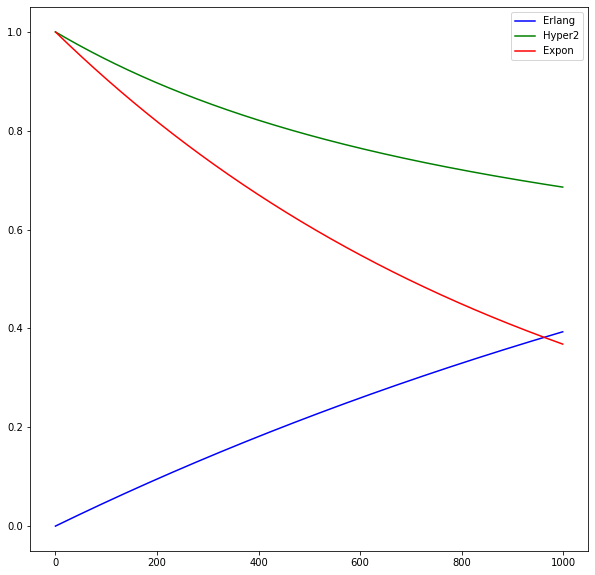

In [113]:
x = np.arange(0,1000,1)
y_erlang = erlang_F(2, 1/2000, x)
y_hyper2 = hyperexponential_R(5/9, 1/5000, 1/500, x)
y_exp    = exponential_R(1/1000 , x)

plt.figure(figsize=(10,10))
plt.plot(x,y_erlang, color="blue",  label="Erlang")
plt.plot(x,y_hyper2, color="green", label="Hyper2")
plt.plot(x, y_exp,   color="red",   label="Expon")
plt.legend()
plt.show()

### Part A

In [114]:
x = 1000
y_erlang = erlang_F(2, 1/2000, x)
y_hyper2 = hyperexponential_R(5/9, 1/5000, 1/500, x)
y_exp    = exponential_R(1/1000 , x)

print("Erlang: ", y_erlang)
print("Hyper2: ", y_hyper2)
print("Expone: ", y_exp)

Erlang:  0.3934693402873666
Hyper2:  0.6857974018918696
Expone:  0.36787944117144233


### Part B

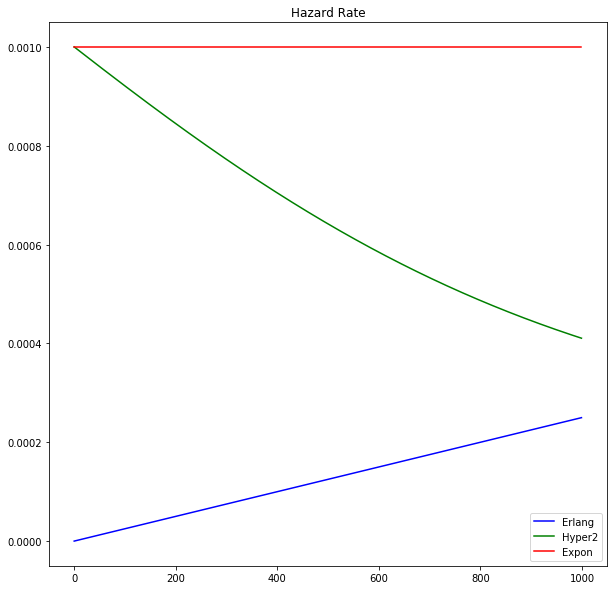

In [115]:
x = np.arange(0,1000,1)
y_exp = np.zeros(x.shape)
y_erlang = erlang_Failure(2, 1/2000, x)
y_hyper2 = hyperexponential_Failure(5/9, 1/5000, 1/500, x)

for i in range(len(y_exp)):
    y_exp[i]    = exponential_Failure(1/1000, x)

plt.figure(figsize=(10,10))
plt.title("Hazard Rate")
plt.plot(x,y_erlang, color="blue",  label="Erlang")
plt.plot(x,y_hyper2, color="green", label="Hyper2")
plt.plot(x, y_exp,   color="red",   label="Expon")
plt.legend()
plt.show()

In [116]:
a = 500
b = 1000

# Erlang
y_erlang = instanteneous_failure(erlang_F(2, 1/2000, b), erlang_F(2, 1/2000, a), erlang_R(2, 1/2000, a))
y_hyper2 = instanteneous_failure(hyperexponential_F(5/9, 1/5000, 1/500, b), hyperexponential_F(5/9, 1/5000, 1/500, a), hyperexponential_R(5/9, 1/5000, 1/500, a))
y_exp    = instanteneous_failure(exponential_F(1/1000, b), exponential_F(1/1000,a), exponential_R(1/1000,a))

print("Erlang: ", y_erlang)
print("Hyper2: ", y_hyper2)
print("Expone: ", y_exp)

Erlang:  0.22119921692859515
Hyper2:  0.13305730481031655
Expone:  0.3934693402873666


In [119]:
# Using Hazard Rate
x = 1000
y_erlang = erlang_Failure(2, 1/2000, x) 
y_hyper2 = hyperexponential_Failure(5/9, 1/5000, 1/500, x) 
y_exp    = exponential_Failure(1/1000, x) 

print("Erlang: ", y_erlang)
print("Hyper2: ", y_hyper2)
print("Expone: ", y_exp)

Erlang:  0.00025
Hyper2:  0.00041022979758906713
Expone:  0.001


### Part C

In [ ]:
The results are very interesting. 
We can see the Erlang Distribution has an IFR. 
We can see that the Hyperexponential has a DFR. 
And we can see that the exponential function has CFR. 